In [1]:
# IMDB 리뷰 데이터 셋
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500, skip_top=20)

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]), len(train_input[1]))

218 189


In [4]:
print(train_input[0]) # 500개의 단어만 가져와서거기에 포함되어지지않은 알수없는단어들은 2 로 채워져있다

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 2, 173, 36, 256, 2, 25, 100, 43, 2, 112, 50, 2, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 2, 2, 2, 38, 2, 447, 2, 192, 50, 2, 2, 147, 2, 2, 2, 22, 2, 2, 2, 469, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2, 2, 2, 480, 66, 2, 33, 2, 130, 2, 2, 38, 2, 2, 25, 124, 51, 36, 135, 48, 25, 2, 33, 2, 22, 2, 215, 28, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 2, 2, 2, 2, 2, 104, 88, 2, 381, 2, 297, 98, 32, 2, 56, 26, 141, 2, 194, 2, 2, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 2, 2, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 2, 38, 2, 88, 2, 2, 283, 2, 2, 2, 113, 103, 32, 2, 2, 2, 2, 178, 32]


In [5]:
print(train_target[:20])  # 감성분류

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
# 훈련 세트에서는 2(어휘 사전에 없는 단어)
for i in range(len(train_input)):
    train_input[i] = [w for w in train_input[i] if w > 2]
    
print(train_input[0])

[22, 43, 65, 458, 66, 173, 36, 256, 25, 100, 43, 112, 50, 35, 480, 284, 150, 172, 112, 167, 336, 385, 39, 172, 38, 447, 192, 50, 147, 22, 469, 22, 71, 87, 43, 38, 76, 22, 62, 386, 316, 106, 480, 66, 33, 130, 38, 25, 124, 51, 36, 135, 48, 25, 33, 22, 215, 28, 77, 52, 407, 82, 107, 117, 256, 36, 71, 43, 476, 26, 400, 317, 46, 104, 88, 381, 297, 98, 32, 56, 26, 141, 194, 226, 22, 21, 134, 476, 26, 480, 144, 30, 51, 36, 28, 224, 92, 25, 104, 226, 65, 38, 88, 283, 113, 103, 32, 178, 32]


In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

95.1862 74.0


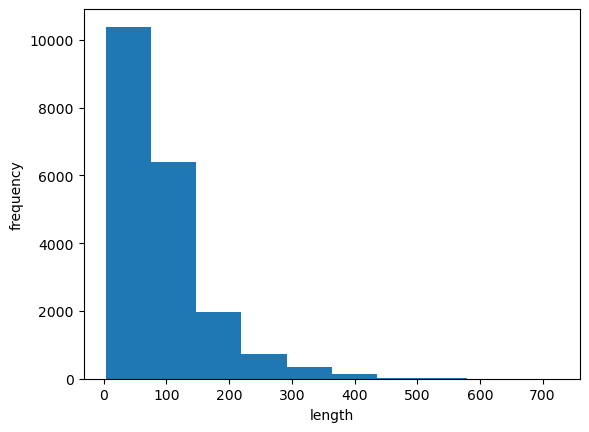

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100) # padding='pre' (post)
train_seq.shape

(20000, 100)

In [12]:
train_seq[0]

array([493, 185, 250,  24,  55,  23, 350,  82,  24,  66,  45,  20,  30,
       190,  20,  43,  32,  99, 157,  46,  32, 267,  73,  36,  26, 400,
        43,  83, 247,  74,  83, 250,  82,  96, 250,  32, 184, 384,  48,
       147,  59,  62,  69,  46,  50,  53,  74,  31, 151,  20, 364, 352,
        45,  33, 269, 142,  73, 204,  55,  92,  66, 104,  20,  93,  76,
       151,  33,  58, 188, 151, 215,  69, 224, 142,  73, 237, 188, 103,
        31, 451,  80,  91,  30,  34,  20, 151,  50,  26, 131,  49,  84,
        46,  50,  37,  80,  79,  46,  20, 470, 158])

In [13]:
train_seq[5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 195,  49,
       190, 352, 183,  82,  79,  36,  71, 269,  25,  49,  48,  25,  40,
        40,  95, 238,  56, 129,  21,  94, 364, 352, 190,  24, 484,  94,
       205, 405,  87,  34,  49, 290,  46,  48,  64])

In [14]:
val_seq = pad_sequences(val_input, maxlen=100) # 범주형일때는 높은 숫자일수록 높은 비중을 차지한다. 
                                               # one_hot으로 펼쳐줘야한다.

### 순환 신경망 만들기

In [15]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100)) # 데이터의 갯수를 줄여준다
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [16]:

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-LSTM-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


history = model.fit(train_seq, train_target, epochs=50, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb])

Epoch 1/50
313/313 [==============================] - 15s 37ms/step - loss: 0.6900 - accuracy: 0.5826 - val_loss: 0.6853 - val_accuracy: 0.6380
Epoch 2/50
313/313 [==============================] - 11s 34ms/step - loss: 0.6737 - accuracy: 0.6914 - val_loss: 0.6556 - val_accuracy: 0.7192
Epoch 3/50
313/313 [==============================] - 11s 34ms/step - loss: 0.6090 - accuracy: 0.7458 - val_loss: 0.5591 - val_accuracy: 0.7574
Epoch 4/50
313/313 [==============================] - 11s 37ms/step - loss: 0.5289 - accuracy: 0.7775 - val_loss: 0.5133 - val_accuracy: 0.7824
Epoch 5/50
313/313 [==============================] - 12s 37ms/step - loss: 0.5006 - accuracy: 0.7915 - val_loss: 0.4899 - val_accuracy: 0.7980
Epoch 6/50
313/313 [==============================] - 11s 35ms/step - loss: 0.4798 - accuracy: 0.8013 - val_loss: 0.4794 - val_accuracy: 0.7978
Epoch 7/50
313/313 [==============================] - 10s 33ms/step - loss: 0.4624 - accuracy: 0.8094 - val_loss: 0.4612 - val_accuracy:

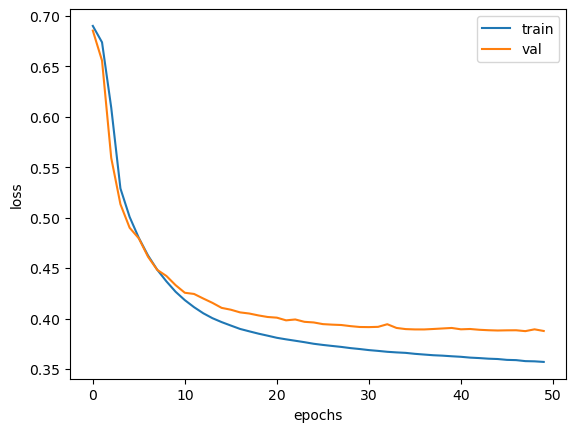

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [18]:
#from tensorflow import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500, skip_top=20)

In [ ]:
print(train_input.shape, test_input.shape)

In [19]:
for i in range(len(train_input)):
    train_input[i] = [w for w in train_input[i] if w > 2]

In [20]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [21]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100) # padding='pre' (post)
train_seq.shape

(20000, 100)

In [23]:
val_seq = pad_sequences(val_input, maxlen=100)

In [27]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.LSTM(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [28]:
train_oh = keras.utils.to_categorical(train_seq)
train_oh.shape

(20000, 100, 500)

In [29]:
val_oh = keras.utils.to_categorical(val_seq)
val_oh.shape

(5000, 100, 500)

In [30]:

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simpleRnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


history = model.fit(train_oh, train_target, epochs=50, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/50
313/313 [==============================] - 37s 102ms/step - loss: 0.6923 - accuracy: 0.5238 - val_loss: 0.6910 - val_accuracy: 0.5528
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 0.6889 - accuracy: 0.5886

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ksbhs\AppData\Local\Temp\ipykernel_4956\1410727551.py", line 8, in <module>
    history = model.fit(train_oh, train_target, epochs=50, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb,early_stopping_cb])
  File "C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\keras\engine\training.py", line 1456, in fit
    _use_cached_eval_dataset=True)
  File "C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\keras\engine\training.py", l

TypeError: object of type 'NoneType' has no len()